In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00:00:0100:01


In [2]:
df_results = pd.read_csv('/kaggle/input/tables/Results_Table.csv')
df_predictions = pd.read_csv('/kaggle/input/tables/Prediction_Table.csv')

In [3]:
df_predictions.head()


,Unnamed: 0,model,dataset_id,testset_size,true_positives,true_negatives,false_positives,false_negatives,accuracy,precision,recall,f1
0,0,bart,3,8806,437,7114,448,807,0.857484,0.493785,0.351286,0.410521
1,1,convbert,3,8806,676,6241,1321,568,0.785487,0.338508,0.543408,0.417155
2,2,electra,3,8806,674,6293,1269,570,0.791165,0.346886,0.541801,0.422968
3,3,gpt2,3,8806,383,7199,363,861,0.861004,0.513405,0.307878,0.384925
4,4,roberta-twitter,3,8806,349,7232,330,895,0.860890,0.513991,0.280547,0.362975


In [9]:
Models = dict(zip(['bart', 'convbert', 'electra', 'gpt2', 'roberta-twitter'], ['Bart','ConvBERT', 'ELECTRA', 'GPT-2', 'RoBERTa-Twitter']))
Categories = dict(zip(range(8), ['Linguistic Bias', 'Cognitive Bias', 'Text Level Context Bias', 'Hate Speech', 'Gender Bias', 'Racial Bias', 'Fake News', 'Political Bias']))
cat = []
for i in list(df_results['category']):
    cat.append(Categories[i])
df_results['Categories'] = cat
    
    
    
mod = []
for i in list(df_results['model']):
    mod.append(Models[i])
df_results['ModelName'] = mod

NameError: name 'df_results' is not defined

In [5]:
mod2 = []
for i in list(df_predictions['model']):
    mod2.append(Models[i])
df_predictions['ModelName'] = mod2

In [19]:
fig = px.line(data_frame=df_results.sort_values(by=['model', 'avg']),
             x = 'ModelName',
             y = 'avg',
             #hover_data = {'model', 'testset_size', 'accuracy', 'precision', 'recall'},
             color = 'Categories',
              template = "seaborn"
            ).update_layout(xaxis_title = "Model", yaxis_title = "Average F1-Score")
fig.show()
fig.write_image('Average_by_category.png')

In [20]:
fig = px.box(data_frame=df_predictions,
             x = 'ModelName',
             y = 'f1',
             template = "seaborn"
            ).update_layout(xaxis_title = "Model", yaxis_title = "F1-Score per Dataset")
#fig.update_layout(hovermode=False)

fig.show()
fig.write_image('BoxPlot_Dataset.png')

In [10]:

Datasets = dict(zip([3,9,10,12,19,25,26,29,34,35,38,40,49,66,72,75,76,87,92,105,106,107,110], ['Wikipedia \n NPOV', 'BASIL ', 'BABE', 'Pheme', 'Mulitdimensional', 'FakeNewsNet', 'WNC', 'SemEval', 'Wasseem', 'MFC', 'Star- \n bucks', 'Jigsaw', 'Us vs \n Them', 'BigNews', 'Liar', 'Reddit- \n Bias', 'Contextual Abuse', 'Online Harassment', 'HateXplain', 'RtGender', 'Workplace Sexism', 'CMSB', 'RacialBias']))
dataset_nam = []
for i in list(df_predictions['dataset_id']):
    dataset_nam.append(Datasets[i])
df_predictions['Datasets'] = dataset_nam
df_predictions.head()

,Unnamed: 0,model,dataset_id,testset_size,true_positives,true_negatives,false_positives,false_negatives,accuracy,precision,recall,f1,ModelName,Datasets
0,0,bart,3,8806,437,7114,448,807,0.857484,0.493785,0.351286,0.410521,Bart,Wikipedia \n NPOV
1,1,convbert,3,8806,676,6241,1321,568,0.785487,0.338508,0.543408,0.417155,ConvBERT,Wikipedia \n NPOV
2,2,electra,3,8806,674,6293,1269,570,0.791165,0.346886,0.541801,0.422968,ELECTRA,Wikipedia \n NPOV
3,3,gpt2,3,8806,383,7199,363,861,0.861004,0.513405,0.307878,0.384925,GPT-2,Wikipedia \n NPOV
4,4,roberta-twitter,3,8806,349,7232,330,895,0.860890,0.513991,0.280547,0.362975,RoBERTa-Twitter,Wikipedia \n NPOV


<AxesSubplot:xlabel='testset_size', ylabel='f1'>

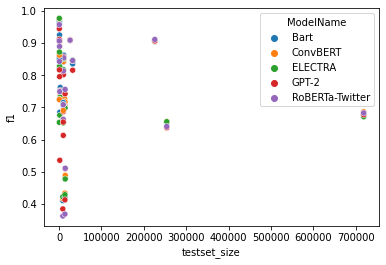

In [3]:
df_raw = pd.read_csv("/kaggle/input/raw-table/Raw_Predictions.csv")

In [4]:
df_test = pd.concat([df_raw[:10], df_raw[:-10]], axis= 0)

In [5]:
dfs_cat = {}
for (cat, ds), b in df_raw.groupby(['category','dataset_id']):
    dfs_cat[cat, ds] = b


In [6]:
columns = ['Category','Dataset_Id', 'Model', 'testset_size', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'accuracy', 'precision', 'recall', 'f1']
lst = []
for cat_ds in dfs_cat:
        dfs_model_tmp = {}
        df_dataset = dfs_cat.get(cat_ds)
        (category, dataset_id) = cat_ds
        for df_model, b in df_dataset.groupby('model'):
            dfs_model_tmp[df_model] = b

        for model in dfs_model_tmp:
            df = dfs_model_tmp.get(model)

            testset_size = len(df)
            true_positives = len(df[(df['predictions'] ==  1) & (df['actuals'] == 1)])
            false_positives = len(df[(df['predictions'] ==  1) & (df['actuals'] == 0)])
            false_negatives = len(df[(df['predictions'] ==  0) & (df['actuals'] == 1)])
            true_negatives = len(df[(df['predictions'] ==  0) & (df['actuals'] == 0)])

            accuracy = 1 - len(df[(df['predictions'] !=  df['actuals'])]) / len(df)
            precision = true_positives / (true_positives + false_positives)
            recall = true_positives / (true_positives + false_negatives)
            if precision + recall != 0:
                f1 = 2*precision*recall / (precision+recall)
            else:
#                print(f'{dataset_id} and {model}.\nTrue Positives: {true_positives},\nFalse Positives: {false_positives},\nFalse Negatives: {false_negatives}')
                f1 = 0
            lst.append([category, dataset_id, model, testset_size, true_positives, true_negatives, false_positives, false_negatives, accuracy, precision, recall, f1])

In [7]:
df_cat_dat = pd.DataFrame(columns=columns, data=lst)

In [10]:
category_names = []
for i in list(df_cat_dat['Category']):
    category_names.append(Categories[i])
df_cat_dat['Categories'] = category_names

Datasets = dict(zip([3,9,10,12,19,25,26,29,34,35,38,40,49,66,72,75,76,87,92,105,106,107,110], ['Wikipedia \n NPOV', 'BASIL ', 'BABE', 'Pheme', 'Mulitdimensional', 'FakeNewsNet', 'WNC', 'SemEval', 'Wasseem', 'MFC', 'Star- \n bucks', 'Jigsaw', 'Us vs \n Them', 'BigNews', 'Liar', 'Reddit- \n Bias', 'Contextual Abuse', 'Online Harassment', 'HateXplain', 'RtGender', 'Workplace Sexism', 'CMSB', 'RacialBias']))
dataset_names = []
for i in list(df_cat_dat['Dataset_Id']):
    dataset_names.append(Datasets[i])
df_cat_dat['Datasets'] = dataset_names

model_names = []
for i in list(df_cat_dat['Model']):
    model_names.append(Models[i])
df_cat_dat['ModelNames'] = model_names

In [21]:
df1 = df_cat_dat[df_cat_dat['Category'] == 3]
df2 = df1[df1['Dataset_Id'] == 87]
df2.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Category               3.000000
Dataset_Id            87.000000
testset_size       13758.000000
true_positives      1249.000000
true_negatives      8982.400000
false_positives     1168.600000
false_negatives     2358.000000
accuracy               0.743669
precision              0.519113
recall                 0.346271
f1                     0.413397
dtype: float64

In [25]:
df3 = df_cat_dat[df_cat_dat['Category'] == 4]
df4 = df3[df3['Dataset_Id'] == 107]
df4.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Category              4.000000
Dataset_Id          107.000000
testset_size       9767.000000
true_positives     1053.600000
true_negatives     7792.000000
false_positives     649.000000
false_negatives     272.400000
accuracy              0.905662
precision             0.619888
recall                0.794570
f1                    0.695784
dtype: float64

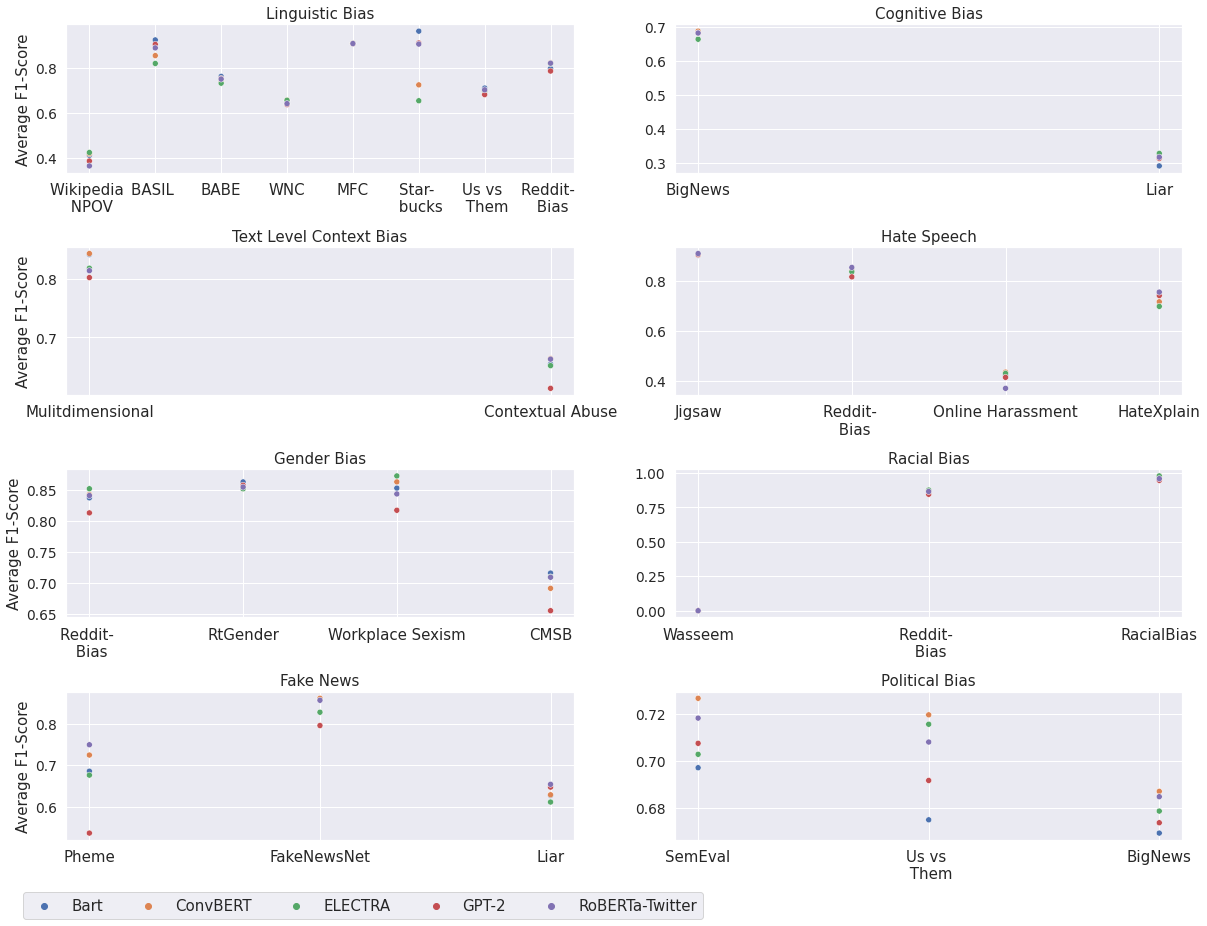

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(20, 15)}, font_scale = 1.25)
fig, axes = plt.subplots(4, 2)
row = 0
for i in range(8):
    if i%2 == 0 and i != 0:
        row+=1 
    sns.scatterplot(x="Datasets", y="f1", data=df_cat_dat[df_cat_dat['Category']==i],
                hue = 'ModelNames', ax = axes[row,i%2])#
    axes[row,i%2].set(xlabel='',
       ylabel='Average F1-Score',
       title=Categories[i])
    if i%2 == 1:
        axes[row,i%2].set(ylabel = '')
    axes[row,i%2].get_legend().remove()
plt.legend(loc="upper left", bbox_to_anchor=(-1.3,-0.3), fontsize='15', ncol=5)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(fontsize= '15')
plt.subplots_adjust(hspace = 0.5)
    
plt.savefig('Performance_on_Datasets.png')
plt.show()


In [20]:
df_cat_dat.head()

,Category,Dataset_Id,Model,testset_size,true_positives,true_negatives,false_positives,false_negatives,accuracy,precision,recall,f1,Categories,Datasets,ModelNames
0,0,3,bart,8806,437,7114,448,807,0.857484,0.493785,0.351286,0.410521,Linguistic Bias,Wikipedia \n NPOV,Bart
1,0,3,convbert,8806,676,6241,1321,568,0.785487,0.338508,0.543408,0.417155,Linguistic Bias,Wikipedia \n NPOV,ConvBERT
2,0,3,electra,8806,674,6293,1269,570,0.791165,0.346886,0.541801,0.422968,Linguistic Bias,Wikipedia \n NPOV,ELECTRA
3,0,3,gpt2,8806,383,7199,363,861,0.861004,0.513405,0.307878,0.384925,Linguistic Bias,Wikipedia \n NPOV,GPT-2
4,0,3,roberta-twitter,8806,349,7232,330,895,0.860890,0.513991,0.280547,0.362975,Linguistic Bias,Wikipedia \n NPOV,RoBERTa-Twitter


In [1]:
df_grouped = df_cat_dat.groupby(['Dataset_Id', 'testset_size']).mean()
df_grouped.reset_index(inplace= True)
df_g = df_grouped.groupby('Dataset_Id').mean()
df_g.reset_index(inplace = True)
Datasets2 = dict(zip([3,9,10,12,19,25,26,29,34,35,38,40,49,66,72,75,76,87,92,105,106,107,110], ['Wikipedia NPOV', 'BASIL ', 'BABE', 'Pheme', 'Mulitdimensional', 'FakeNewsNet', 'WNC', 'SemEval', 'Wasseem', 'MFC', 'Starbucks', 'Jigsaw', 'UsvsThem', 'BigNews', 'Liar', 'Reddit-Bias', 'Contextual Abuse', 'Online Harassment', 'HateXplain', 'RtGender', 'Workplace Sexism', 'CMSB', 'RacialBias']))
man_aut = dict(zip([3,9,10,12,19,25,26,29,34,35,38,40,49,66,72,75,76,87,92,105,106,107,110],['manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'auto', 'manual', 'manual', 'manual', 'manual', 'manual', 'auto','manual', 'manual', 'manual']))
dataset_names = []
for i in list(df_g['Dataset_Id']):
    dataset_names.append(Datasets2[i])
df_g['Datasets'] = dataset_names
df_g = df_g.drop(df_g.index[8])
df_g = df_g.reset_index()
df_g['testset_size'] = df_g['testset_size'] / 5

NameError: name 'df_cat_dat' is not defined

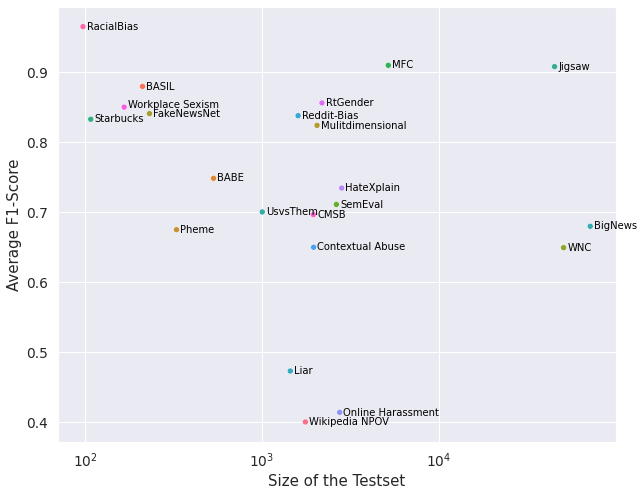

In [109]:
import numpy as np
import math 
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots()


sns.set(rc={"figure.figsize":(12, 8)},font_scale = 1.25)
fig = sns.scatterplot(x='testset_size', y='f1', data = df_g, hue= 'Datasets', legend = False)

for i in range(len(df_g)):
    if df_g.Datasets[i] == 'Workplace Sexism':
        plt.text(x=df_g.testset_size[i]+ 0.05*(10**math.log10(df_g.testset_size[i])),y=df_g.f1[i]-0.001,s=df_g.Datasets[i],
                 fontdict=dict(color='black',size=10))
    else:
        plt.text(x=df_g.testset_size[i]+ 0.05*(10**math.log10(df_g.testset_size[i])),y=df_g.f1[i]-0.004,s=df_g.Datasets[i], 
                fontdict=dict(color='black',size=10))
fig.set(xscale= 'log', xlabel= 'Size of the Testset', ylabel = "Average F1-Score")
plt.savefig('Performance_vs_Size.png')
plt.show()

In [23]:
df_cat_dat

,Category,Dataset_Id,Model,testset_size,true_positives,true_negatives,false_positives,false_negatives,accuracy,precision,recall,f1,Categories,Datasets,ModelNames
0,0,3,bart,8806,437,7114,448,807,0.857484,0.493785,0.351286,0.410521,Linguistic Bias,Wikipedia \n NPOV,Bart
1,0,3,convbert,8806,676,6241,1321,568,0.785487,0.338508,0.543408,0.417155,Linguistic Bias,Wikipedia \n NPOV,ConvBERT
2,0,3,electra,8806,674,6293,1269,570,0.791165,0.346886,0.541801,0.422968,Linguistic Bias,Wikipedia \n NPOV,ELECTRA
3,0,3,gpt2,8806,383,7199,363,861,0.861004,0.513405,0.307878,0.384925,Linguistic Bias,Wikipedia \n NPOV,GPT-2
4,0,3,roberta-twitter,8806,349,7232,330,895,0.860890,0.513991,0.280547,0.362975,Linguistic Bias,Wikipedia \n NPOV,RoBERTa-Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,7,66,bart,361464,108060,146616,34037,72751,0.704568,0.760466,0.597641,0.669293,Political Bias,BigNews,Bart
141,7,66,convbert,361464,116164,139453,41200,64647,0.707171,0.738187,0.642461,0.687005,Political Bias,BigNews,ConvBERT
142,7,66,electra,361464,129398,109515,71138,51413,0.660959,0.645261,0.715653,0.678637,Political Bias,BigNews,ELECTRA
143,7,66,gpt2,361464,111997,140970,39683,68814,0.699840,0.738377,0.619415,0.673684,Political Bias,BigNews,GPT-2


In [26]:
df_bal_per = df_cat_dat.groupby(['Category', 'Categories','ModelNames']).mean()['f1']

In [27]:
df_bal_per

Category  Categories               ModelNames     
0         Linguistic Bias          Bart               0.766452
                                   ConvBERT           0.728365
                                   ELECTRA            0.713699
                                   GPT-2              0.745947
                                   RoBERTa-Twitter    0.747991
1         Cognitive Bias           Bart               0.488129
                                   ConvBERT           0.499504
                                   ELECTRA            0.494905
                                   GPT-2              0.496839
                                   RoBERTa-Twitter    0.498621
2         Text Level Context Bias  Bart               0.747746
                                   ConvBERT           0.753268
                                   ELECTRA            0.734798
                                   GPT-2              0.707551
                                   RoBERTa-Twitter    0.738232
3   

In [31]:
df_new = df_bal_per.reset_index().sort_values(['Category', 'f1'], ascending = False)
df_new.to_csv('Balanced_performance_scores.csv')